# Dataset 4 - Boston

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../src')
warnings.filterwarnings('ignore')

In [2]:
import train_test
import ABC_train_test
import bostonDataset
import baselineModels
import network
import statsModel
import performanceMetrics
import dataset
import sanityChecks
import torch 
import matplotlib.pyplot as plt 
import seaborn as sns 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Parameters

General Parameters 

1. Number of Samples
2. Number of features 

ABC-Generator parameters are as mentioned below: 
1. mean : 1 ($\beta \sim N(\beta^{*},\sigma)$ where $\beta^{*}$ are coefficients of statistical model) or 1 ($\beta \sim N(0,\sigma)$
2. std : $\sigma = 1, 0.1 , 0.01$ (standard deviation)

In [3]:
n_features = 13
n_samples= 506
n_target = 1 
 
#ABC Generator Parameters
mean = 1 
variance = 0.01

#Hyper-parameters 
n_epochs = 100

## Dataset

In [4]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.755
Model:                            OLS   Adj. R-squared (uncentered):              0.747
Method:                 Least Squares   F-statistic:                              92.52
Date:                Fri, 26 Nov 2021   Prob (F-statistic):                   1.63e-110
Time:                        00:13:10   Log-Likelihood:                         -298.21
No. Observations:                 404   AIC:                                      622.4
Df Residuals:                     391   BIC:                                      674.4
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

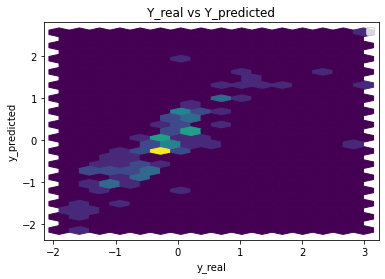

Performance Metrics
Mean Squared Error: 0.28933565743633943
Mean Absolute Error: 0.3459732293345774
Manhattan distance: 35.289269392126904
Euclidean distance: 5.4325166413464965


In [6]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

## Random Forest

In [7]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)

Mean Squared error 0.19560454317763848


## Catboost

In [8]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)

Learning rate set to 0.03548
0:	learn: 0.9891457	total: 56.5ms	remaining: 56.5s
1:	learn: 0.9665713	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9452825	total: 60.4ms	remaining: 20.1s
3:	learn: 0.9284039	total: 62ms	remaining: 15.4s
4:	learn: 0.9075984	total: 63.9ms	remaining: 12.7s
5:	learn: 0.8895556	total: 65.8ms	remaining: 10.9s
6:	learn: 0.8709990	total: 67.7ms	remaining: 9.61s
7:	learn: 0.8543333	total: 69.5ms	remaining: 8.61s
8:	learn: 0.8385457	total: 71.3ms	remaining: 7.85s
9:	learn: 0.8216393	total: 73.2ms	remaining: 7.25s
10:	learn: 0.8087687	total: 75.1ms	remaining: 6.76s
11:	learn: 0.7923994	total: 77ms	remaining: 6.34s
12:	learn: 0.7768107	total: 78.8ms	remaining: 5.99s
13:	learn: 0.7611570	total: 80.7ms	remaining: 5.68s
14:	learn: 0.7470751	total: 82.7ms	remaining: 5.43s
15:	learn: 0.7313660	total: 84.5ms	remaining: 5.19s
16:	learn: 0.7174019	total: 86.4ms	remaining: 5s
17:	learn: 0.7038044	total: 88.5ms	remaining: 4.83s
18:	learn: 0.6911385	total: 90.4ms	remaining: 4.67s


207:	learn: 0.2092766	total: 478ms	remaining: 1.82s
208:	learn: 0.2087722	total: 480ms	remaining: 1.81s
209:	learn: 0.2081952	total: 482ms	remaining: 1.81s
210:	learn: 0.2075187	total: 483ms	remaining: 1.81s
211:	learn: 0.2070761	total: 485ms	remaining: 1.8s
212:	learn: 0.2060470	total: 487ms	remaining: 1.8s
213:	learn: 0.2055138	total: 489ms	remaining: 1.79s
214:	learn: 0.2049183	total: 491ms	remaining: 1.79s
215:	learn: 0.2040960	total: 492ms	remaining: 1.79s
216:	learn: 0.2037116	total: 495ms	remaining: 1.78s
217:	learn: 0.2032395	total: 497ms	remaining: 1.78s
218:	learn: 0.2027364	total: 499ms	remaining: 1.78s
219:	learn: 0.2022057	total: 500ms	remaining: 1.77s
220:	learn: 0.2017647	total: 502ms	remaining: 1.77s
221:	learn: 0.2011484	total: 504ms	remaining: 1.77s
222:	learn: 0.2008316	total: 506ms	remaining: 1.76s
223:	learn: 0.2002629	total: 508ms	remaining: 1.76s
224:	learn: 0.1994006	total: 510ms	remaining: 1.76s
225:	learn: 0.1990181	total: 512ms	remaining: 1.75s
226:	learn: 0.

368:	learn: 0.1460272	total: 817ms	remaining: 1.4s
369:	learn: 0.1456238	total: 820ms	remaining: 1.4s
370:	learn: 0.1453283	total: 822ms	remaining: 1.39s
371:	learn: 0.1448914	total: 824ms	remaining: 1.39s
372:	learn: 0.1448017	total: 828ms	remaining: 1.39s
373:	learn: 0.1444427	total: 830ms	remaining: 1.39s
374:	learn: 0.1440559	total: 832ms	remaining: 1.39s
375:	learn: 0.1436706	total: 834ms	remaining: 1.38s
376:	learn: 0.1433465	total: 837ms	remaining: 1.38s
377:	learn: 0.1430285	total: 840ms	remaining: 1.38s
378:	learn: 0.1427687	total: 843ms	remaining: 1.38s
379:	learn: 0.1423085	total: 846ms	remaining: 1.38s
380:	learn: 0.1419061	total: 848ms	remaining: 1.38s
381:	learn: 0.1415446	total: 850ms	remaining: 1.37s
382:	learn: 0.1414304	total: 851ms	remaining: 1.37s
383:	learn: 0.1413639	total: 853ms	remaining: 1.37s
384:	learn: 0.1412970	total: 855ms	remaining: 1.36s
385:	learn: 0.1409760	total: 857ms	remaining: 1.36s
386:	learn: 0.1405997	total: 859ms	remaining: 1.36s
387:	learn: 0.

602:	learn: 0.1034550	total: 1.32s	remaining: 869ms
603:	learn: 0.1032401	total: 1.32s	remaining: 867ms
604:	learn: 0.1030776	total: 1.32s	remaining: 864ms
605:	learn: 0.1030495	total: 1.32s	remaining: 862ms
606:	learn: 0.1027721	total: 1.33s	remaining: 860ms
607:	learn: 0.1026233	total: 1.33s	remaining: 857ms
608:	learn: 0.1024769	total: 1.33s	remaining: 855ms
609:	learn: 0.1023662	total: 1.33s	remaining: 852ms
610:	learn: 0.1020676	total: 1.33s	remaining: 850ms
611:	learn: 0.1020404	total: 1.34s	remaining: 847ms
612:	learn: 0.1019299	total: 1.34s	remaining: 845ms
613:	learn: 0.1018059	total: 1.34s	remaining: 843ms
614:	learn: 0.1015824	total: 1.34s	remaining: 840ms
615:	learn: 0.1014366	total: 1.34s	remaining: 838ms
616:	learn: 0.1012617	total: 1.35s	remaining: 836ms
617:	learn: 0.1010086	total: 1.35s	remaining: 833ms
618:	learn: 0.1009840	total: 1.35s	remaining: 831ms
619:	learn: 0.1007910	total: 1.35s	remaining: 828ms
620:	learn: 0.1006890	total: 1.35s	remaining: 826ms
621:	learn: 

787:	learn: 0.0798273	total: 1.66s	remaining: 447ms
788:	learn: 0.0797109	total: 1.66s	remaining: 445ms
789:	learn: 0.0795853	total: 1.67s	remaining: 443ms
790:	learn: 0.0795196	total: 1.67s	remaining: 441ms
791:	learn: 0.0794661	total: 1.67s	remaining: 438ms
792:	learn: 0.0793587	total: 1.67s	remaining: 436ms
793:	learn: 0.0791699	total: 1.67s	remaining: 434ms
794:	learn: 0.0791246	total: 1.68s	remaining: 432ms
795:	learn: 0.0789343	total: 1.68s	remaining: 430ms
796:	learn: 0.0788603	total: 1.68s	remaining: 428ms
797:	learn: 0.0787244	total: 1.68s	remaining: 426ms
798:	learn: 0.0786447	total: 1.68s	remaining: 424ms
799:	learn: 0.0785739	total: 1.69s	remaining: 421ms
800:	learn: 0.0783996	total: 1.69s	remaining: 419ms
801:	learn: 0.0783282	total: 1.69s	remaining: 417ms
802:	learn: 0.0783174	total: 1.69s	remaining: 415ms
803:	learn: 0.0783117	total: 1.7s	remaining: 413ms
804:	learn: 0.0781931	total: 1.7s	remaining: 411ms
805:	learn: 0.0779891	total: 1.7s	remaining: 409ms
806:	learn: 0.0

983:	learn: 0.0606264	total: 2s	remaining: 32.6ms
984:	learn: 0.0605345	total: 2s	remaining: 30.5ms
985:	learn: 0.0604471	total: 2.01s	remaining: 28.5ms
986:	learn: 0.0603526	total: 2.01s	remaining: 26.4ms
987:	learn: 0.0602399	total: 2.01s	remaining: 24.4ms
988:	learn: 0.0601216	total: 2.01s	remaining: 22.4ms
989:	learn: 0.0600115	total: 2.01s	remaining: 20.3ms
990:	learn: 0.0599362	total: 2.01s	remaining: 18.3ms
991:	learn: 0.0597958	total: 2.02s	remaining: 16.3ms
992:	learn: 0.0597527	total: 2.02s	remaining: 14.2ms
993:	learn: 0.0596707	total: 2.02s	remaining: 12.2ms
994:	learn: 0.0595736	total: 2.02s	remaining: 10.2ms
995:	learn: 0.0594796	total: 2.02s	remaining: 8.12ms
996:	learn: 0.0593906	total: 2.02s	remaining: 6.09ms
997:	learn: 0.0593324	total: 2.02s	remaining: 4.06ms
998:	learn: 0.0592697	total: 2.03s	remaining: 2.03ms
999:	learn: 0.0591659	total: 2.03s	remaining: 0us
Mean Squared error 0.11951216477681163


## Common Training Parameters (Vanilla NN & GAN & ABC_GAN) 

In [9]:
threshold_mse = mse_cb
batch_size = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Vanilla Neural Network 

In [11]:
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 1.189035618513736


## GAN Model

**Training GAN for n_epochs number of epochs** 

In [12]:
generator = network.Generator(n_features+1).to(device)
discriminator = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(generator.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(discriminator.parameters(), lr=0.01, betas=(0.5, 0.999))

In [13]:
print(generator)
print(discriminator)

Generator(
  (hidden1): Linear(in_features=14, out_features=100, bias=True)
  (hidden2): Linear(in_features=100, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)
Discriminator(
  (hidden1): Linear(in_features=14, out_features=25, bias=True)
  (hidden2): Linear(in_features=25, out_features=50, bias=True)
  (output): Linear(in_features=50, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


In [14]:
discLossG1,genLossG1 = train_test.training_GAN(discriminator,generator,disc_opt,gen_opt,train_data,batch_size, n_epochs,criterion,device)

In [15]:
GAN1_metrics = train_test.test_generator(generator,test_data,device)

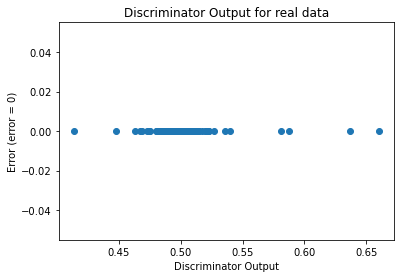

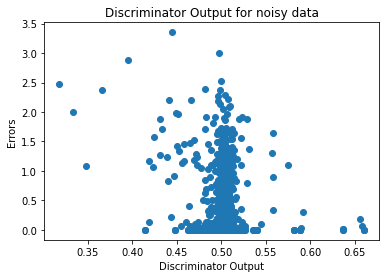

In [16]:
sanityChecks.discProbVsError(real_dataset,discriminator,device)

**Training GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [17]:
generator2 = network.Generator(n_features+1).to(device)
discriminator2 = network.Discriminator(n_features+1).to(device)
criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(generator2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(discriminator2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [18]:
discLossG2,genLossG2 = train_test.training_GAN_2(discriminator2,generator2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,device)

Number of epochs needed 5000


In [19]:
GAN2_metrics=train_test.test_generator_2(generator2,test_data,device)

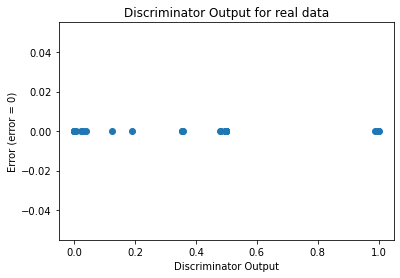

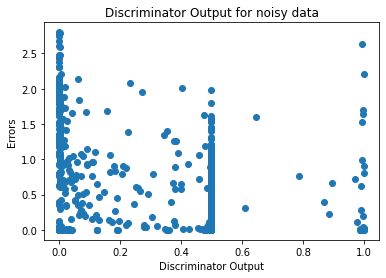

In [20]:
sanityChecks.discProbVsError(real_dataset,discriminator2,device)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [21]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [22]:
discLossA1,genLossA1 = ABC_train_test.training_GAN(disc, gen,disc_opt,gen_opt,train_data,batch_size, n_epochs,criterion,coeff,mean,variance,device)

In [23]:
ABC_GAN1_metrics=ABC_train_test.test_generator(gen,test_data,coeff,mean,variance,device)

#### Sanity Checks 

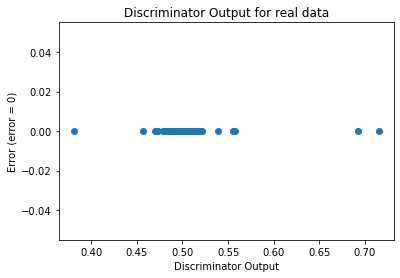

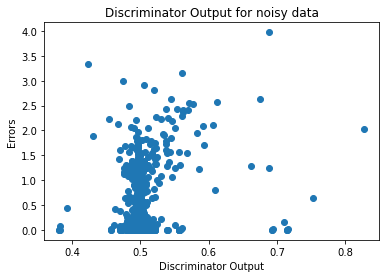

In [24]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [25]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [26]:
discLossA2,genLossA2 = ABC_train_test.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,coeff,mean,variance,device)

Number of epochs 5000


In [27]:
ABC_GAN2_metrics=ABC_train_test.test_generator_2(gen2,test_data,coeff,mean,variance,device)

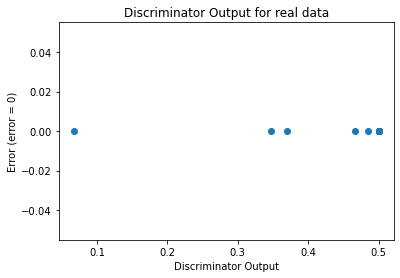

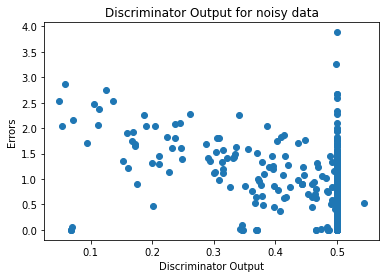

In [28]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# Model Analysis

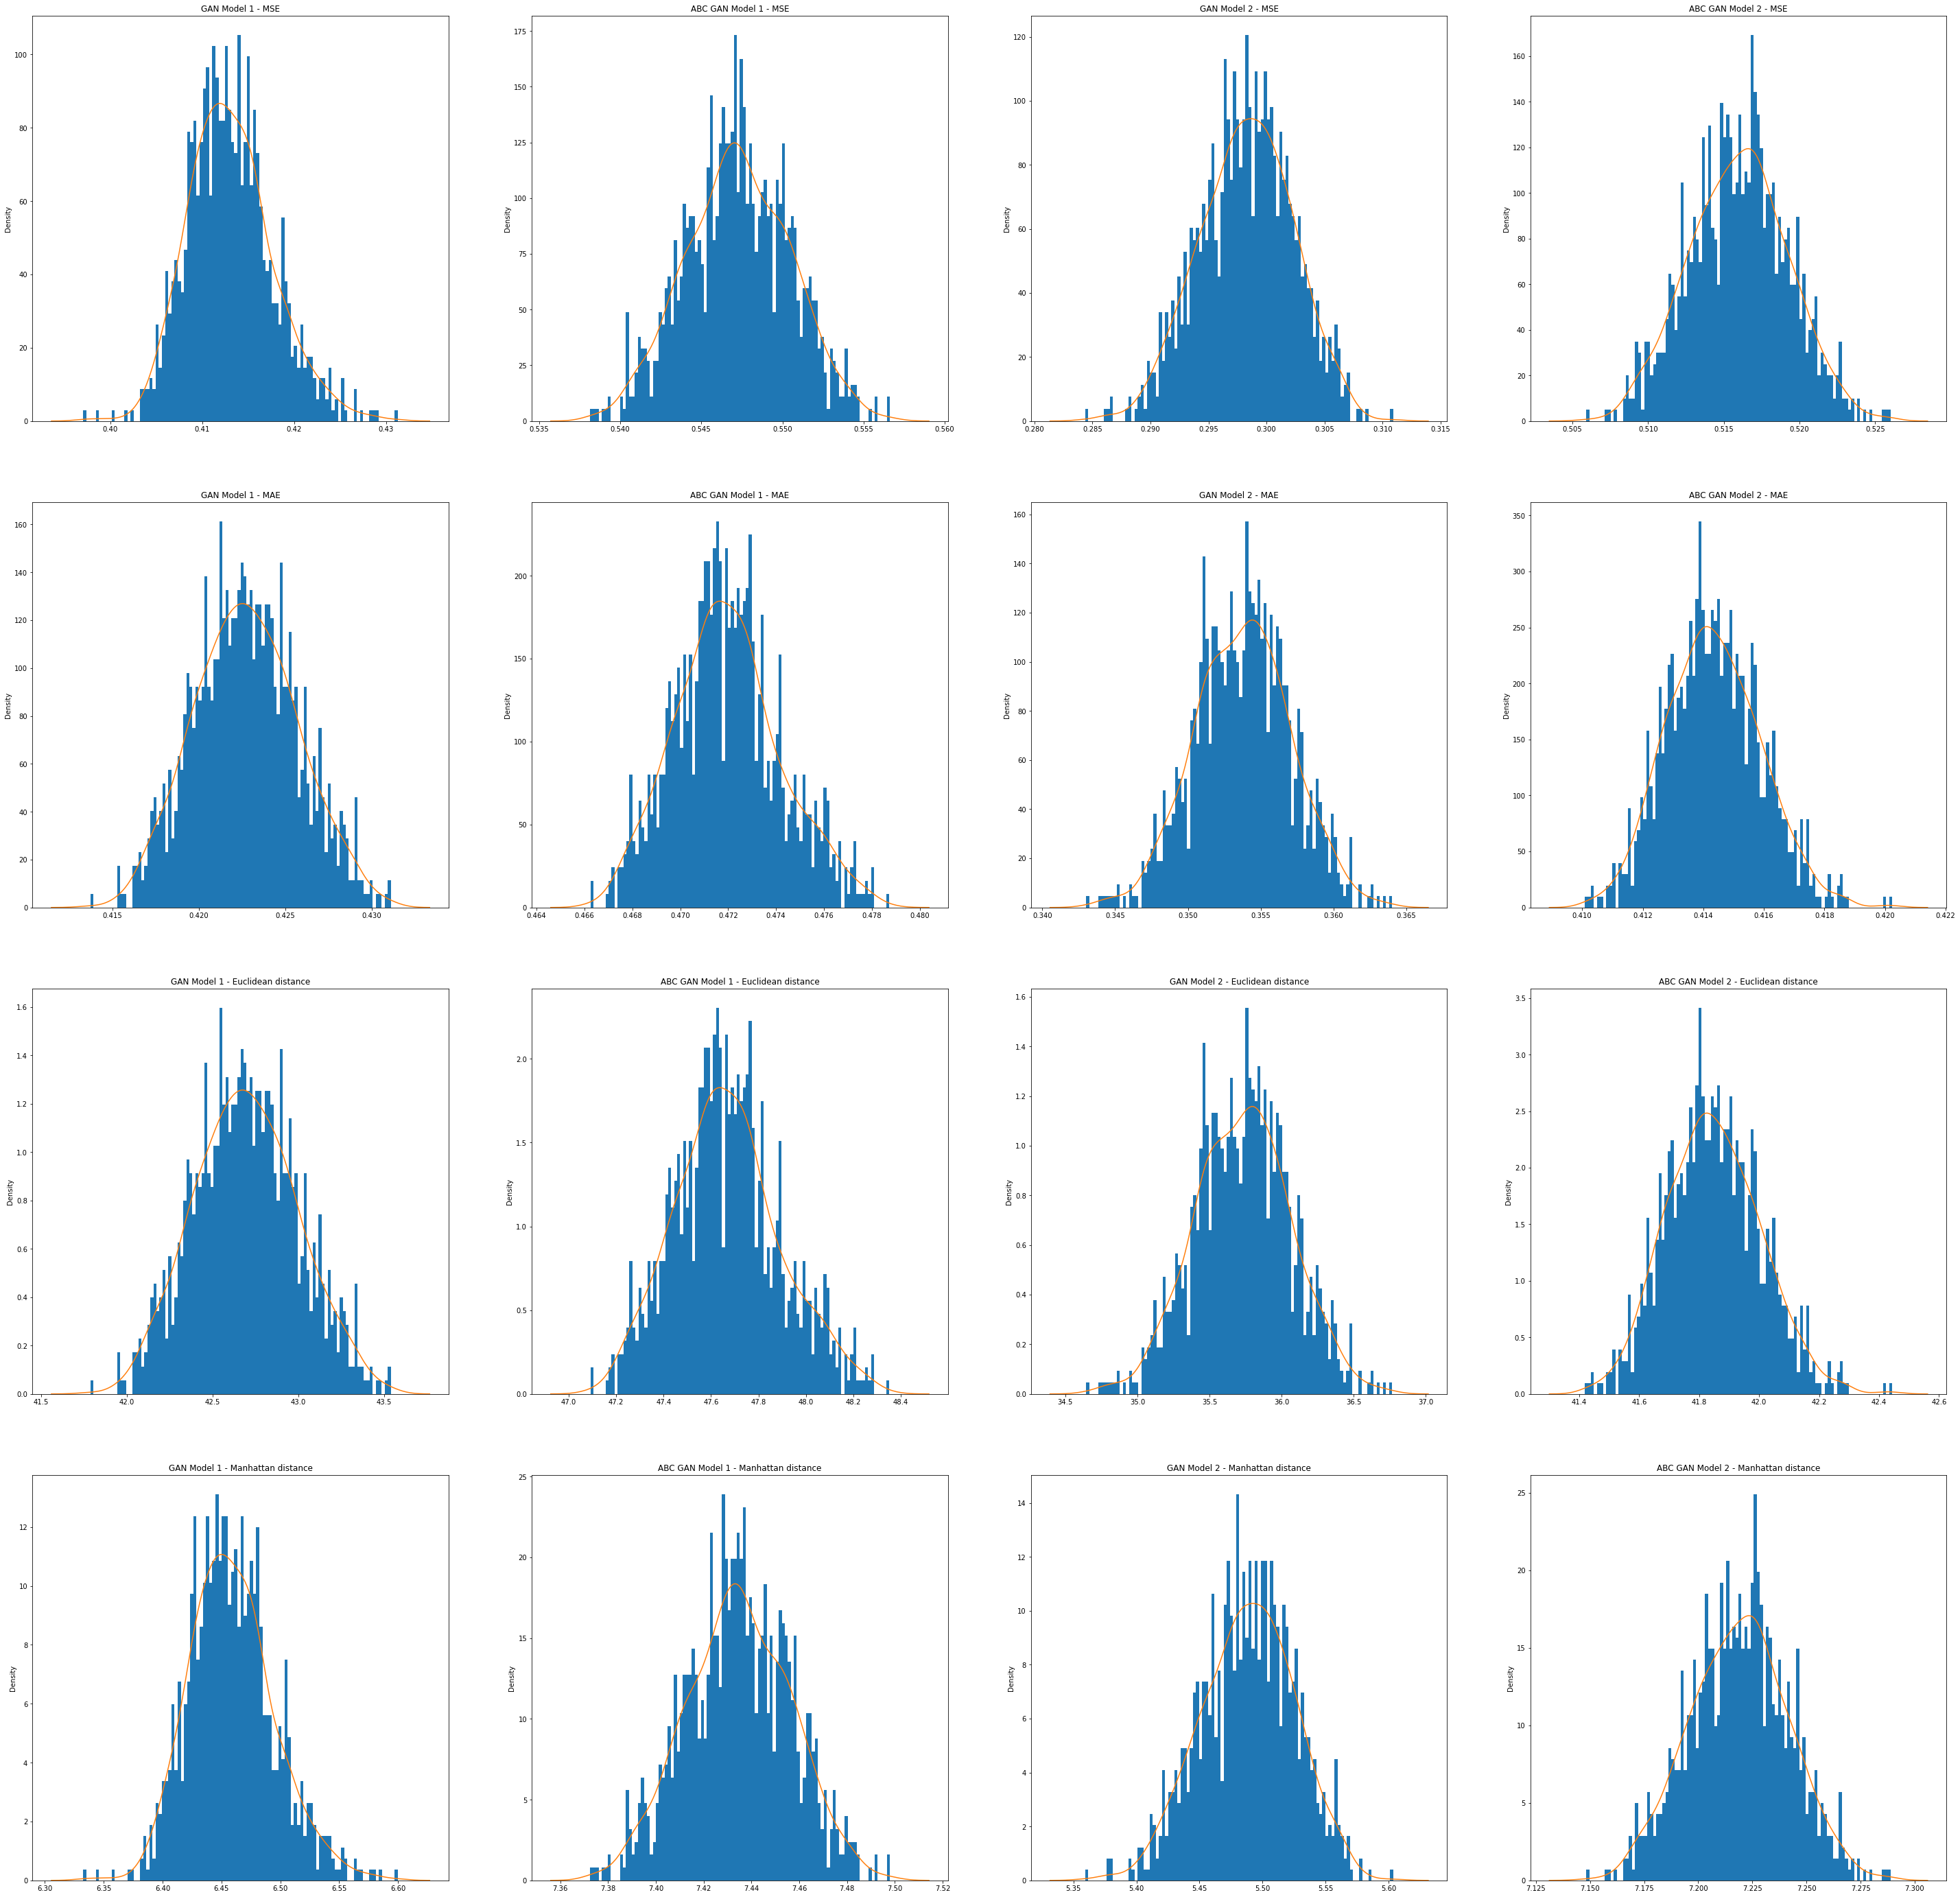

In [29]:
performanceMetrics.modelAnalysis(GAN1_metrics,ABC_GAN1_metrics,GAN2_metrics,ABC_GAN2_metrics)

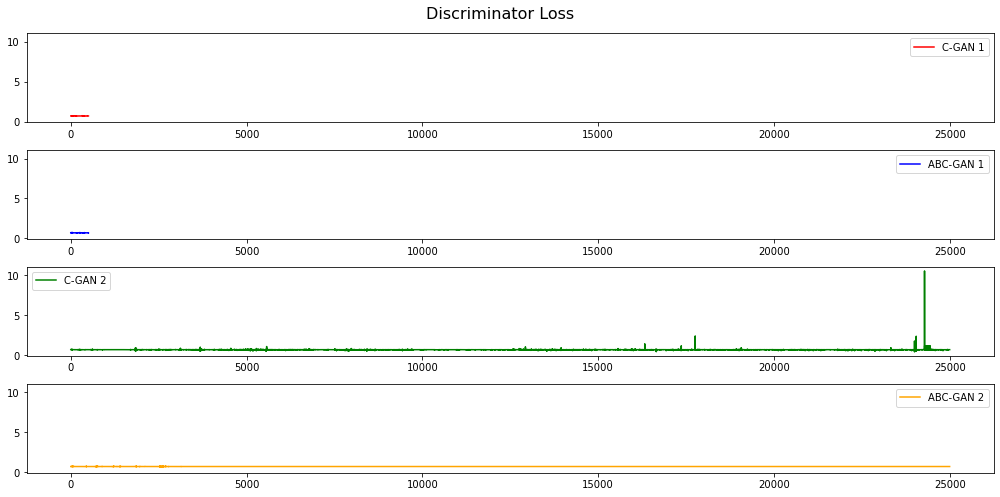

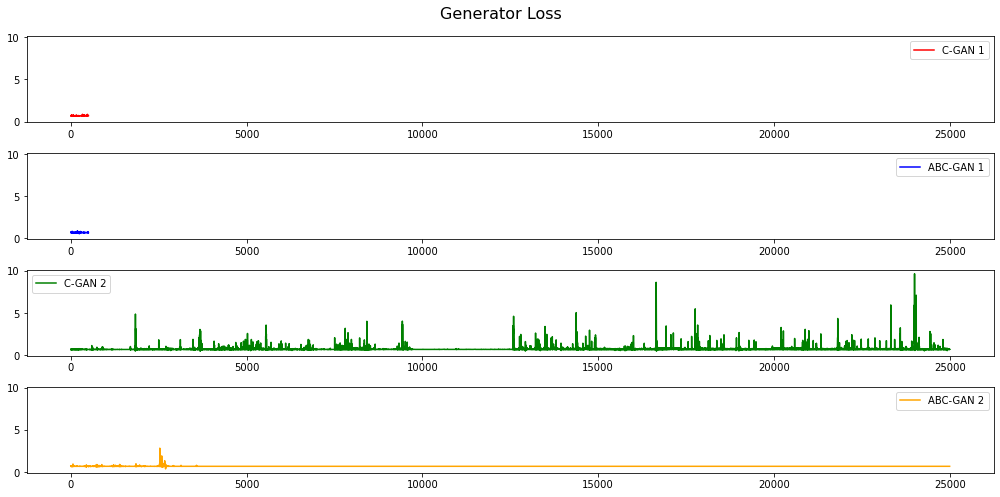

In [30]:
performanceMetrics.plotTrainingLoss(discLossG1,genLossG1,discLossA1,genLossA1,discLossG2,genLossG2,discLossA2,genLossA2)

# ABC - GAN Model with skip connection

In [31]:
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))

In [32]:
discLossA3,genLossA3 = ABC_train_test.training_GAN(disc3, gen3,disc_opt,gen_opt,train_data,batch_size, n_epochs,criterion,coeff,mean,variance,device)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument tensors in method wrapper___cat)

In [ ]:
ABC_GAN3_metrics=ABC_train_test.test_generator(gen3,test_data,coeff,mean,variance,device)

In [ ]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)

In [ ]:
performanceMetrics.modelAnalysis2(ABC_GAN3_metrics)

In [ ]:
performanceMetrics.plotTrainingLoss2(discLossA3,genLossA3)